#1.Download the dataset: Dataset

#2. Load the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
file=pd.read_csv("Mall_Customers.csv")
data=pd.DataFrame(file)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#3. Perform Below Visualizations.


#Univariate Analysis



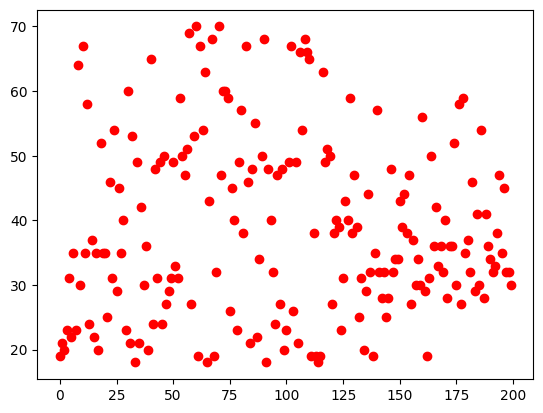

In [ ]:
plt.scatter(data.index,data['Age'],color='red')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Count'>

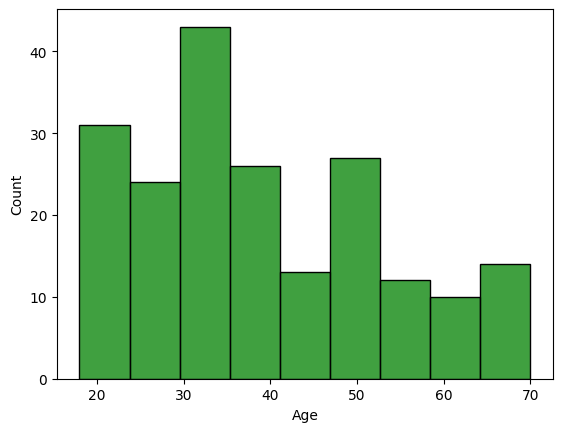

In [ ]:
sns.histplot(data["Age"],color='green')

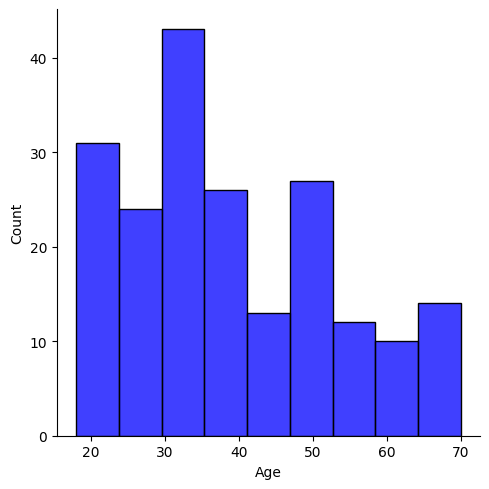

In [ ]:
sns.displot(data["Age"],color='blue')

<AxesSubplot: >

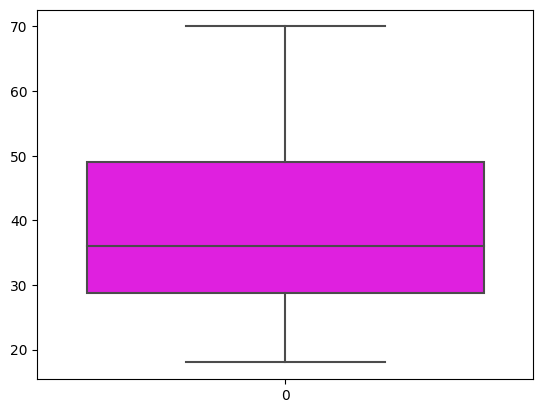

In [ ]:
sns.boxplot(data["Age"],color='magenta')

#Bi-Varient



Text(0, 0.5, '  Gender')

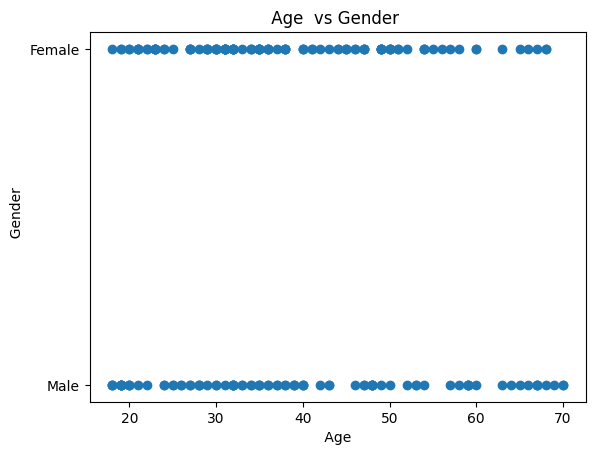

In [ ]:
plt.scatter(data.Age, data.Gender)
plt.title(' Age  vs Gender  ')
plt.xlabel(' Age ')
plt.ylabel('  Gender')

<AxesSubplot: >

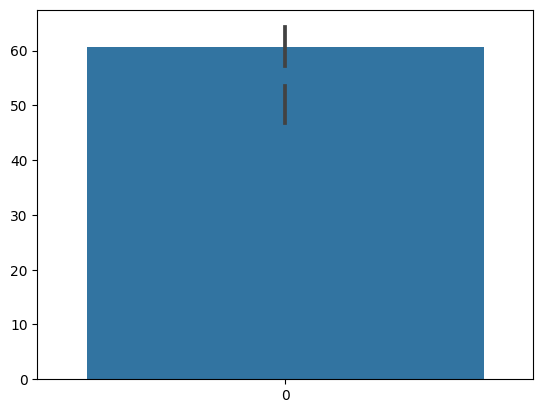

In [ ]:
sns.barplot(data["Annual Income (k$)"])
sns.barplot(data["Spending Score (1-100)"])

<AxesSubplot: ylabel='Annual Income (k$)'>

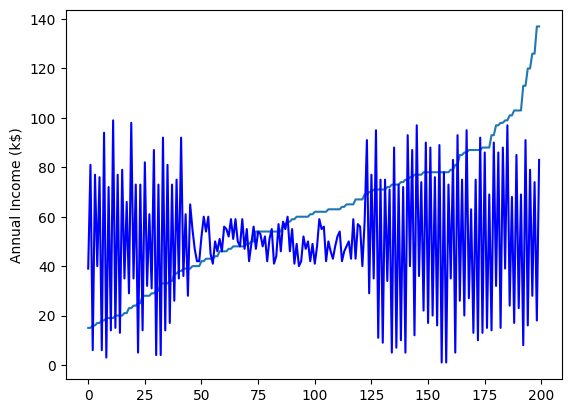

In [ ]:
sns.lineplot(data["Annual Income (k$)"])
sns.lineplot(data["Spending Score (1-100)"], color='blue')

<AxesSubplot: xlabel='Age', ylabel='Gender'>

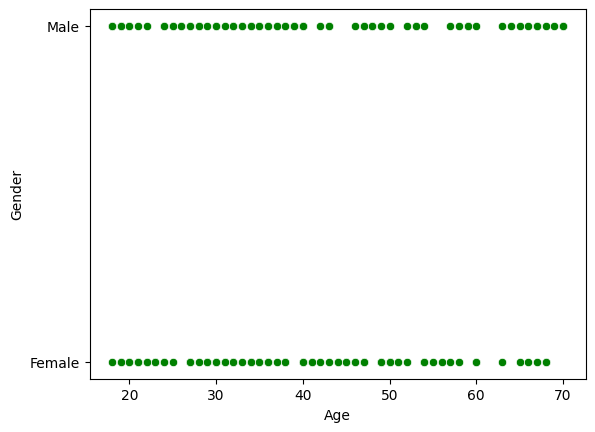

In [ ]:
sns.scatterplot(x=data.Age,y=data.Gender,color='green')

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

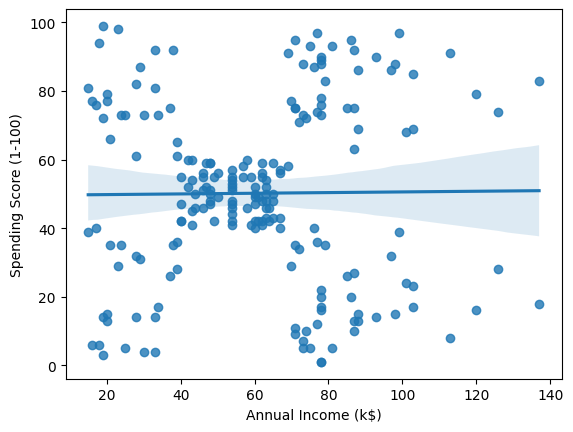

In [ ]:
sns.regplot(x = "Annual Income (k$)",
            y = "Spending Score (1-100)",
            data = data,
            dropna = True)

In [ ]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


#Multi-Variate

<function matplotlib.pyplot.show(close=None, block=None)>

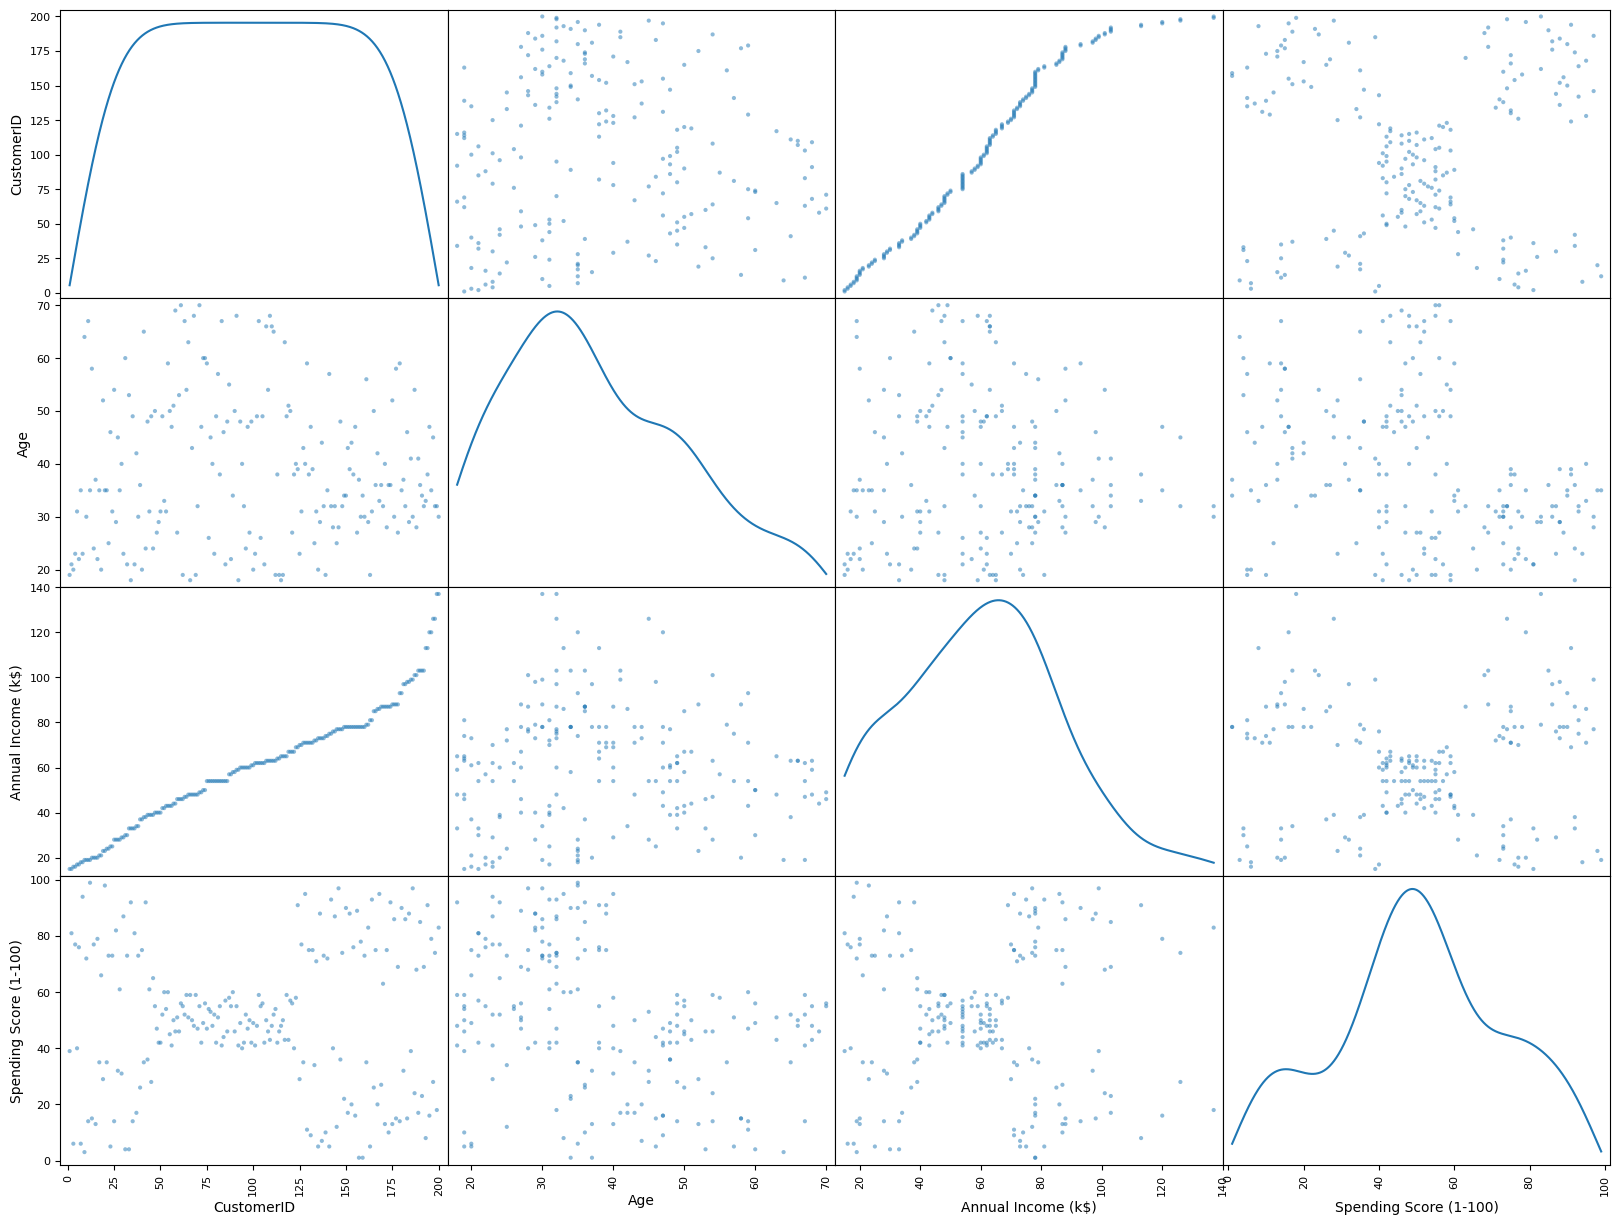

In [ ]:
pd.plotting.scatter_matrix(data.loc[:,"CustomerID":"Spending Score (1-100)"],diagonal="kde",figsize=(20,15))
plt.show

#4. Perform descriptive statistics on the dataset

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#5. Check for Missing values and deal with them

In [ ]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#6. Find the outliers and replace the outliers

<AxesSubplot: >

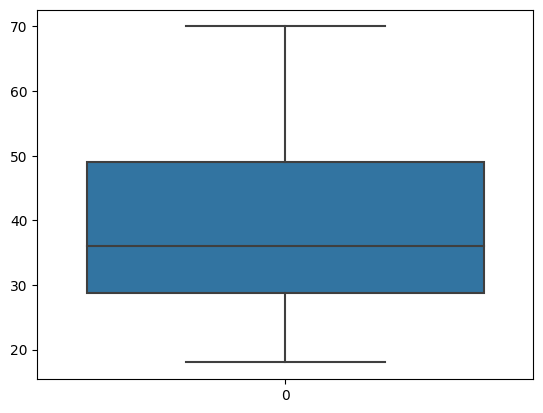

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
data.mean()

C:\Users\dines\AppData\Local\Temp\ipykernel_13284\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:

data.std()

C:\Users\dines\AppData\Local\Temp\ipykernel_13284\2795280948.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

In [ ]:
q=data.quantile(q=[0.75,0.5])
iqr=q.iloc[0]-q.iloc[1]
iqr


CustomerID                49.75
Age                       13.00
Annual Income (k$)        16.50
Spending Score (1-100)    23.00
dtype: float64

In [ ]:
l=q.iloc[1]-(1.5*iqr)
l['Age']

16.5

In [ ]:
u=q.iloc[1]+(1.5*iqr)
u['Age']

55.5

<AxesSubplot: >

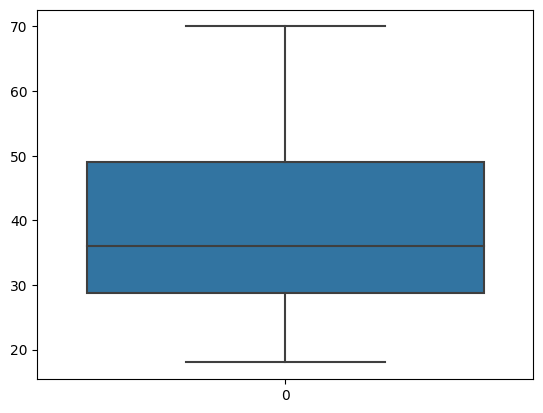

In [ ]:
sns.boxplot(data['Age'])


<AxesSubplot: >

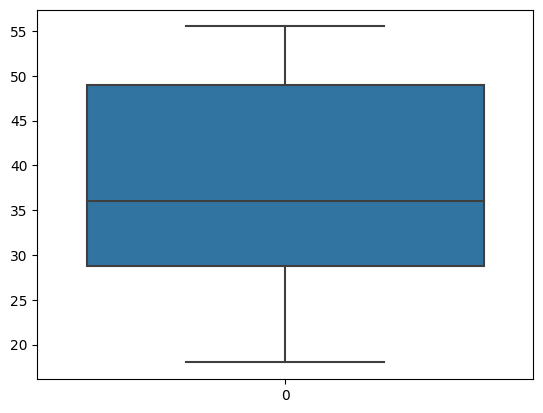

In [ ]:
data['Age']=np.where(data['Age']>u['Age'],u['Age'],np.where(data['Age']<l['Age'],l['Age'],data['Age']))
sns.boxplot(data['Age'])

#7.Check for Categorical columns and perform encoding

In [ ]:
data['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19.0,15,39
1,2,0,21.0,15,81
2,3,1,20.0,16,6
3,4,1,23.0,16,77
4,5,1,31.0,17,40


#8.Spilt Data int Dependent and Independent Variables

In [ ]:
y=data['Gender']
y

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [ ]:
x=data.drop(columns=['Gender'],axis=1)
x.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15,39
1,2,21.0,15,81
2,3,20.0,16,6
3,4,23.0,16,77
4,5,31.0,17,40


#9. Perform any of the clustering algorithms

In [ ]:
from sklearn import cluster

In [ ]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    error.append(kmeans.inertia_)

In [ ]:
error

[965435.4087499998,
 377132.2736273627,
 262117.5443412849,
 186423.9380861838,
 149504.61256253906,
 114403.64248213927,
 95074.75733137564,
 78104.73345410629,
 70581.20772018186,
 64164.72585440874]

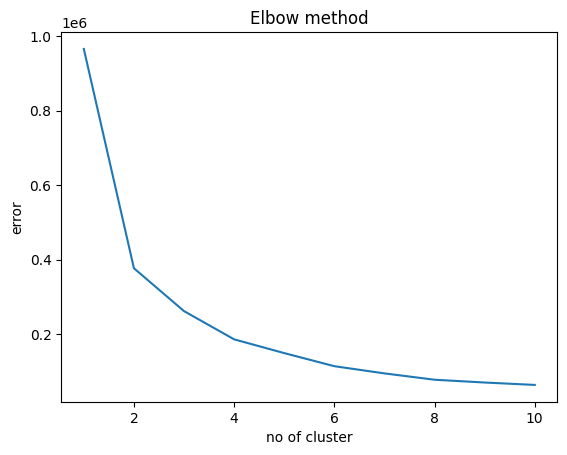

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of cluster')
plt.ylabel('error')
plt.show()

In [ ]:
k_means_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [ ]:
k_means_model.fit(data)

KMeans(n_clusters=3, random_state=0)

In [ ]:
clustered_data =k_means_model.predict(data)

#10. Add the cluster data with the primary dataset

In [ ]:
data['Clustered_data'] = pd.Series(clustered_data)

In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clustered_data
195,196,1,35.0,120,79,0
196,197,1,45.0,126,28,0
197,198,0,32.0,126,74,0
198,199,0,32.0,137,18,0
199,200,0,30.0,137,83,0


#11.Split the data into dependent and independent variables

In [ ]:
y=data['Clustered_data']
y  

0      2
1      2
2      2
3      2
4      2
      ..
195    0
196    0
197    0
198    0
199    0
Name: Clustered_data, Length: 200, dtype: int32

In [ ]:
X=data.drop(columns=['Clustered_data'],axis=1)
X.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19.0,15,39
1,2,0,21.0,15,81
2,3,1,20.0,16,6
3,4,1,23.0,16,77
4,5,1,31.0,17,40


#11. Scalling

In [ ]:
names=x.columns
names

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x = scale(x)

In [ ]:
x


array([[-1.7234121 , -1.56143278, -1.73899919, -0.43480148],
       [-1.70609137, -1.39463532, -1.73899919,  1.19570407],
       [-1.68877065, -1.47803405, -1.70082976, -1.71591298],
       [-1.67144992, -1.22783785, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56064798, -1.66266033, -0.39597992],
       [-1.63680847, -1.31123658, -1.66266033,  1.00159627],
       [-1.61948775, -0.22705305, -1.62449091, -1.71591298],
       [-1.60216702, -1.22783785, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.48262098, -1.58632148, -1.83237767],
       [-1.56752558, -0.64404672, -1.58632148,  0.84631002],
       [-1.55020485,  1.48262098, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.22705305, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.48262098, -1.54815205, -1.36651894],
       [-1.49824268, -1.14443912, -1.54815205,  1.04041783],
       [-1.48092195, -0.06025558, -1.54815205, -1.44416206],
       [-1.46360123, -1.31123658, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

#12.Split the data into Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(160, 4)

In [ ]:
x_test.shape

(40, 4)

In [ ]:
y_train.shape

(160,)

In [ ]:
y_test.shape

(40,)

In [ ]:
print(x_train.shape,x_test.shape)

(160, 4) (40, 4)


#13. Build the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict_train = model.predict(x_train)

#14. Train the Model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))

Training accuracy:  1.0


#15. Test the Model

In [ ]:
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Testing accuracy:  0.975



#16. Measure the performance using Metrics

In [ ]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2
Clustered_data,,,
0,21,1,0
1,0,7,0
2,0,0,11


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

